# Explore parameter space to search for anomolous behavior

\begin{equation}
    \langle n \rangle(\lambda) = \dfrac{K\lambda}{1+K\lambda}
\end{equation} where $\lambda = e^{\beta \mu}$.

\begin{equation}
K=K(\beta; \delta, \epsilon_\heartsuit, \epsilon_\triangle)=\dfrac{1}{1+e^{-\beta\delta}}e^{-\beta \epsilon_\triangle} + \dfrac{e^{-\beta\delta}}{1+e^{-\beta\delta}}e^{-\beta \epsilon_\heartsuit}
\end{equation}.

We define material space to be $( \delta, \epsilon_\heartsuit, \epsilon_\triangle)$.

In [1]:
using ForwardDiff
using Printf
using PyPlot

In [25]:
struct Material
    δ::Float64
    ♡::Float64
    ▿::Float64
end

function Base.show(io::IO, material::Material)
    @printf("MORF material with:\n\tδ = %.3f\n\tϵ_♡ = %.3f\n\tϵ_▿ = %.3f\n", material.δ, material.♡, material.▿)
end

# example use
material = Material(1.0, -3.0, 4.0)

MORF material with:
	δ = 1.000
	ϵ_♡ = -3.000
	ϵ_▿ = 4.000


In [26]:
function K(β::Real, material::Material) # must assert β::Real as opposed to β::Float64 for ForwardDiff.jl to work
    p_ring_on_♡ = 1.0 / (1 + exp(-β * material.δ)) # without gas, that is
    return p_ring_on_♡ * exp(-β * material.▿) + (1.0 - p_ring_on_♡) * exp(-β * material.♡)
end

K (generic function with 1 method)

In [27]:
function ∂K_∂β(β::Float64, material::Material)
    # view K as a function of β only.
    K_of_β(x) = K(x[1], material) # x plays role of β
    ∂K_∂β_of_β = x -> ForwardDiff.gradient(K_of_β, x) # x plays role of β
    return ∂K_∂β_of_β([β])[1]
end

∂K_∂β (generic function with 1 method)

In [42]:
nb_pts = 10
♡_range = range(-4.0, stop=0.0, length=nb_pts)
▿_range = range(-4.0, stop=0.0, length=nb_pts)
δ_range = range(0.0, stop=4.0, length=nb_pts)
β_range = range(0.01, stop=10.0, length=nb_pts)

for ♡ in ♡_range
    for ▿ in ▿_range
        for δ in δ_range
            material = Material(δ, ♡, ▿)
            for β in β_range
                # well, for Henry's law under this model
                dn_dβ = K(β, material) + β * ∂K_∂β(β, material)
                if dn_dβ < 0.0
                    @printf("∂⟨n⟩/∂β < 0 when δ = %f ϵ_♡ = %.2f ϵ_▿ = %.2f β = %.2f\n", δ, ♡, ▿, β)
                end
            end
        end
    end
end

∂⟨n⟩/∂β < 0 when δ = 4.000000 ϵ_♡ = -4.00 ϵ_▿ = 0.00 β = 10.00


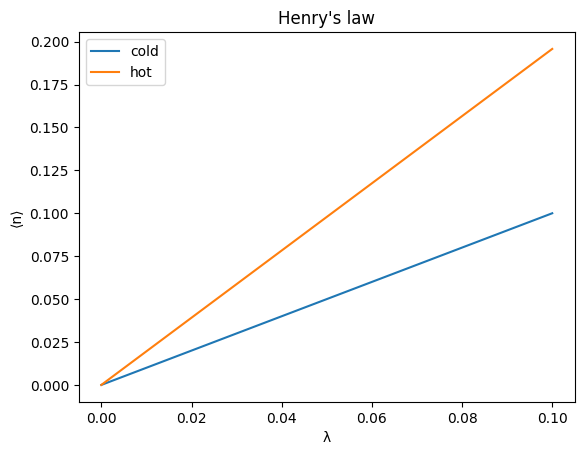

PyObject Text(0.5, 1.0, "Henry's law")

In [45]:
λ = range(0.0, stop=0.1, length=100)
β = 10.0

material = Material(4.0, -4.0, 0.0)

fig = plt.figure()
plot(λ, K(β, material) * λ, label="cold")
plot(λ, K(β*0.9, material) * λ, label="hot")
legend()
plt.xlabel("λ")
plt.ylabel("⟨n⟩")
plt.title("Henry's law")